<a href="https://colab.research.google.com/github/DevTedd/Regression-Analysis-Moringa-Core-W6/blob/main/Independent_Project_Regression_Basic_Moringa_Ted_Mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

# Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type


**Model 1**: Predict how many goals the home team scores.

**Model 2**: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# Dataset Columns



* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue




# 1. Defining the question






# A) Specifying the questions 




*   Predict how many goals the home team scores.

*   Predict how many goals the away team scores.

*   Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


# B) Defining the metric for Success


*  Model 1: Predict how many goals the home team scores.
*  Model 2: Predict how many goals the away team scores.
*   Model 3 : Being able to tell how the home team perfromed 



# C) Understanding the context

The datasets are derived from the Fifa World Rankings database for football games payed by men split into country teams. Its from 1993 to 2018 and can be confirmed by checking the results from the databse to those that are hosted online 

# 2) Reading in the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb


In [25]:
#Importing the dataset
fifa = pd.read_csv('/content/drive/MyDrive/Week 6 IP/Week 6 IP Datasets/fifa_ranking.csv')
results = pd.read_csv('/content/drive/MyDrive/Week 6 IP/Week 6 IP Datasets/results.csv')

In [4]:
#Seeing what is in the fifa set details
fifa.shape

(57793, 16)

In [14]:
#seeing the head of the fifa set
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
#seeing the tail
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [8]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [9]:
#Seeing the results dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
results.shape

(40839, 9)

In [12]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [13]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Now that the dataset has been loaded we will move onto the EDA. The first model will be a a polynomial regression 

In [15]:
results.info()
#There is no missing data in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


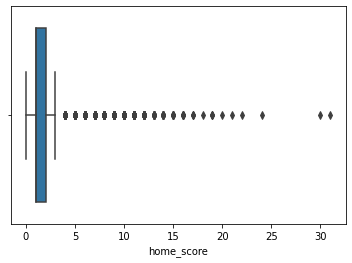

In [18]:
#Checking for outliers
results.describe()
sb.boxplot(x = results['home_score'])

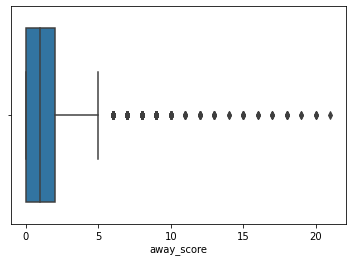

In [19]:
sb.boxplot(x = results['away_score'])
#Majority of goals scored per game is ussualy less than 3 which is true with some games being exceptions with more
#I wont remove these as they do occur and training a model to ignore them isnt suitable 

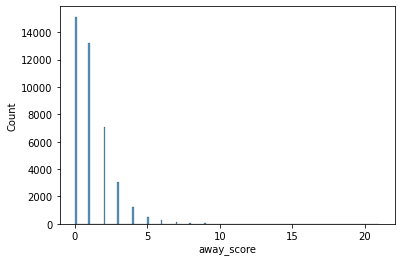

In [20]:
#The second step is to perfom some univariate analysis 
sb.histplot(x=results['away_score'])
sb.histplot(x=results['home_score'])

In [23]:
#Time to do encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [26]:
results['tournamentEnco'] = label.fit_transform(results['tournament'])
results['home_teamEnco'] = label.fit_transform(results['home_team'])
results['away_teamEnco'] = label.fit_transform(results['away_team'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,tournamentEnco,home_teamEnco,away_teamEnco
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,54,238,85
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,54,85,233
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,54,238,85
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,54,85,233
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,54,238,85


In [42]:
cors = results.corr()
cors
#The values are not ver related

,home_score,away_score,neutral,tournamentEnco,home_teamEnco,away_teamEnco
home_score,1.000000,-0.133412,-0.031660,0.003414,0.005179,-0.014927
away_score,-0.133412,1.000000,0.084335,0.029274,-0.019501,0.024628
neutral,-0.031660,0.084335,1.000000,-0.109582,-0.079991,0.102481
tournamentEnco,0.003414,0.029274,-0.109582,1.000000,-0.013873,-0.011635
home_teamEnco,0.005179,-0.019501,-0.079991,-0.013873,1.000000,-0.008210
away_teamEnco,-0.014927,0.024628,0.102481,-0.011635,-0.008210,1.000000


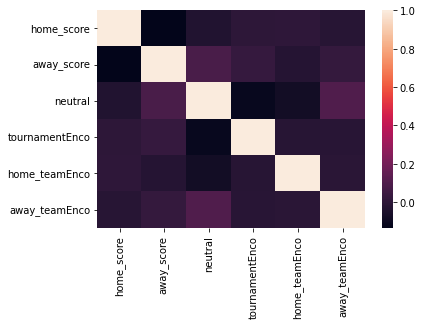

In [41]:
sb.heatmap(results.corr())

In [43]:
pd.DataFrame(np.linalg.inv(cors.values), index = cors.index, columns=cors.columns)
#None of the values are dependent on each other

,home_score,away_score,neutral,tournamentEnco,home_teamEnco,away_teamEnco
home_score,1.018680,0.134167,0.019268,-0.005194,-0.001109,0.009858
away_score,0.134167,1.026767,-0.084209,-0.039753,0.011917,-0.015020
neutral,0.019268,-0.084209,1.037434,0.116035,0.082016,-0.101932
tournamentEnco,-0.005194,-0.039753,0.116035,1.014222,0.022612,0.000996
home_teamEnco,-0.001109,0.011917,0.082016,0.022612,1.007111,-0.000184
away_teamEnco,0.009858,-0.015020,-0.101932,0.000996,-0.000184,1.010973


In [44]:
#Preparing the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
#The first step is to predict the scores for the home team
X_home = results.drop(['home_score','date','home_team','away_team','tournament','city','country','neutral','away_score','away_teamEnco'], axis=1)
X_home
y = results['home_score']


0        0
1        4
2        2
3        2
4        3
        ..
40834    8
40835    4
40836    0
40837    0
40838    1
Name: home_score, Length: 40839, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_home, y, test_size=0.2, random_state=0)
#Splitting the data slice into train and test

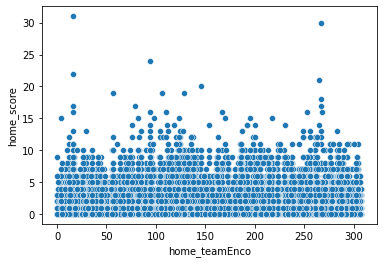

In [49]:
sb.scatterplot(x=X_home['home_teamEnco'],y = y,data=results)

In [50]:
reg_line = LinearRegression()
reg_line.fit(X,y)


LinearRegression()

In [59]:
preds = np.array(X_home['home_teamEnco'])
preds = preds.reshape(-1,1)
preds.shape

(40839, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

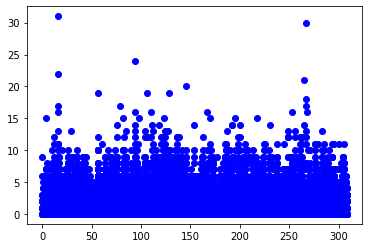

In [61]:
import matplotlib.pyplot as plt
plt.scatter(X_home['home_teamEnco'], y, color='blue')
plt.plot(preds, reg_line.predict(X_home['home_teamEnco']), color='red')

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_home_Poly = poly_reg.fit_transform(X_home)

p_reg = LinearRegression()
p_reg.fit(X_home,y)

LinearRegression()

In [64]:
predicts = p_reg.predict(poly_reg.fit_transform([[6]]))
print('Polynomial prediction: %d' %predicts)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

# Trying out logisitic regression, the other one is stuck

In [65]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,tournamentEnco,home_teamEnco,away_teamEnco
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,54,238,85
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,54,85,233
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,54,238,85
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,54,85,233
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,54,238,85
...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,83,5,262
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,83,94,243
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,7,239,4
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,61,268,189


In [ ]:
#The collum that i will add will be to ensure if i know whether the team won or drew or lost
def myFunk(home_score, class):
  if

In [ ]:
log_data = results.drop(['date','home_team','away_team','tournament','city','country','neutral'])